   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 111.4 MB/s eta 0:00:00
Starting data merge and cleaning process...

Cleaning complete! The master file 'cleaned_nigerian_stock_data.csv' has been created.
Total rows after cleaning: 23600

First 5 rows of cleaned data:
        Date  Price  Open  High   Low       Vol.  Change % Organisation
0 2015-01-05   0.84  0.84  0.84  0.83   842910.0    0.0370        AIICO
1 2015-01-06   0.80  0.85  0.85  0.80  1910000.0   -0.0476        AIICO
2 2015-01-07   0.78  0.76  0.78  0.76  1820000.0   -0.0250        AIICO
3 2015-01-08   0.75  0.76  0.76  0.75   584040.0   -0.0385        AIICO
4 2015-01-09   0.78  0.76  0.78  0.75  3230000.0    0.0400        AIICO

Data Types after Cleaning:
Date            datetime64[ns]
Price                  float64
Open                   float64
High                   float64
Low                    float64
Vol.                   float64
C

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,301 (493.36 KB)

 Trainable params: 126,301 (493.36 KB)

 Non-trainable params: 0 (0.00 B)


Starting Model Training...
Epoch 1/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - loss: 0.0096 - val_loss: 0.0063
Epoch 2/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - loss: 5.0098e-04 - val_loss: 0.0012
Epoch 3/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 224ms/step - loss: 4.0067e-04 - val_loss: 0.0014
Epoch 4/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - loss: 3.9619e-04 - val_loss: 0.0011
Epoch 5/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - loss: 3.3383e-04 - val_loss: 0.0015
Epoch 6/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - loss: 3.0985e-04 - val_loss: 9.9163e-04
Epoch 7/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - loss: 3.0784e-04 - val_loss: 9.1327e-04
Epoch 8/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - loss: 2.8243e-04 - val_loss: 0.0011
Epoch 9/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - loss: 2.3922e-04 - val_loss: 0.0011
Epoch 10/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - loss: 2.2586e-04 - val_loss: 8.7271e-04
Epoch 11/25
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - loss


Trained LSTM model saved to: lstm_model_nse.h5


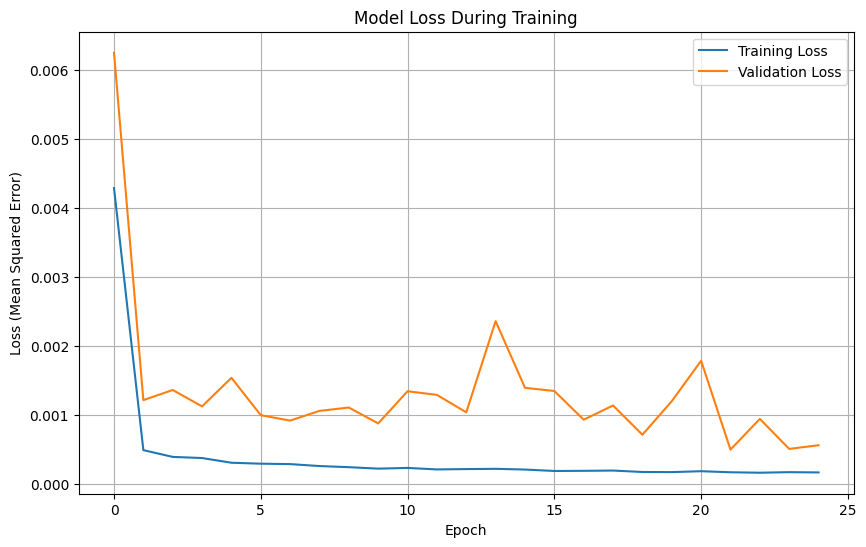


STREAMLIT DEPLOYMENT SCRIPT (app.py)

import streamlit as st
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# --- 1. CONFIGURATION AND LOADING ---

# Define file paths
MODEL_FILE = 'lstm_model_nse.h5'
SCALER_FILE = 'scaler_nse.joblib'
DATA_FILE = 'cleaned_nigerian_stock_data.csv'
LOOKBACK_PERIOD = 60 # Must match the training lookback period

st.set_page_config(layout="wide", page_title="Stock Price Prediction (LSTM)")

# Cache resources (model and scaler) so they only load once
@st.cache_resource
def load_all_files():
    """Loads model, scaler, and cleaned data from disk."""
    try:
        model = load_model(MODEL_FILE)
        scaler = joblib.load(SCALER_FILE)
        df = pd.read_csv(DATA_FILE)
        df['Date'] = pd.to_datetime(df['Date'])
        return model, scaler, df
    except FileNotFoundError as e:
        st.error(f"FATAL ERROR: Required file not found. Please ensure {e.filename} and

In [1]:
# -*- coding: utf-8 -*-
"""Stock_Price_Prediction_Colab.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/notebooks/welcome.ipynb

# **LEVERAGING HISTORICAL MARKET DATA FOR STOCK PRICE PREDICTION USING RNN-BASED MODEL**
### **Project by: ABDULRASHID Abubakar, Modibbo Adama University, Yola**

This Google Colab notebook provides the full workflow for preparing the Nigerian Stock Exchange (NSE) data, training an LSTM Recurrent Neural Network (RNN) model for price prediction, and saving the necessary files for local Streamlit deployment.

---

## **SECTION 1: SETUP AND DATA LOADING**

### **1.1 Install Necessary Libraries**

Run this cell to ensure all required libraries (TensorFlow for the model, Streamlit for the app, and Joblib for file saving) are installed in the Colab environment.
"""

!pip install pandas numpy tensorflow scikit-learn streamlit joblib matplotlib

"""### **1.2 Import Libraries**"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Set randomness seed for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

"""### **1.3 Data Merging and Cleaning**

This section replicates the data merging and then performs the crucial cleaning and type conversion steps necessary for time series analysis and LSTM modeling.

**NOTE:** Before running this cell, **upload all 10 original CSV files** (e.g., `AIICO Historical Data.csv`, `DANGCEM Historical Data.csv`, etc.) to your Colab session's file storage (the folder icon on the left).
"""

# --- File Configuration ---
file_names = [
    "AIICO Historical Data.csv", "DANGCEM Historical Data.csv", "GUINNES Historical Data.csv",
    "JBERGER Historical Data.csv", "NB Historical Data.csv", "NESTLE Historical Data.csv",
    "NSE All Share Historical Data (1).csv", "UBA Historical Data.csv", "UNILEVE Historical Data.csv",
    "ZENITHB Historical Data.csv"
]
output_file_name = 'cleaned_nigerian_stock_data.csv'
all_data = []

print("Starting data merge and cleaning process...")

for file_name in file_names:
    organisation_name = file_name.split(' ')[0].replace('.csv', '')

    try:
        df = pd.read_csv(file_name, low_memory=False)
        df['Organisation'] = organisation_name
        all_data.append(df)
    except FileNotFoundError:
        print(f"  [ERROR] File not found: {file_name}. Please check your uploads.")
    except Exception as e:
        print(f"  [ERROR] Error processing {file_name}: {e}")

# Merge all dataframes
df_master = pd.concat(all_data, ignore_index=True)

# --- Data Cleaning Functions ---

def clean_value(value, is_percentage=False):
    """Cleans up numeric strings containing commas, M/K suffixes, and percent signs."""
    if pd.isna(value) or value == '-':
        return np.nan
    try:
        value = str(value).replace(',', '').replace('"', '').strip()

        if is_percentage and value.endswith('%'):
            value = float(value.replace('%', ''))
            return value / 100.0 # Convert percentage string to decimal float

        if value.endswith('M'):
            return float(value[:-1]) * 1_000_000
        elif value.endswith('K'):
            return float(value[:-1]) * 1_000

        return float(value)
    except:
        return np.nan

# --- Apply Cleaning ---

# Clean Price, Open, High, Low
price_cols = ['Price', 'Open', 'High', 'Low']
for col in price_cols:
    df_master[col] = df_master[col].apply(clean_value)

# Clean Vol. (Volume)
df_master['Vol.'] = df_master['Vol.'].apply(lambda x: clean_value(x, is_percentage=False))

# Clean Change %
df_master['Change %'] = df_master['Change %'].apply(lambda x: clean_value(x, is_percentage=True))

# Convert Date to datetime objects
df_master['Date'] = pd.to_datetime(df_master['Date'], dayfirst=True, errors='coerce')

# Drop unused/empty columns and rows with missing prices (essential features)
df_master.drop(columns=['Unnamed: 7', 'Unnamed: 8'], errors='ignore', inplace=True)
df_master.dropna(subset=price_cols, inplace=True)

# Sort by Date (Crucial for Time Series)
df_master.sort_values(by=['Organisation', 'Date'], inplace=True)
df_master.reset_index(drop=True, inplace=True)

# Save the cleaned file
df_master.to_csv(output_file_name, index=False)

print(f"\nCleaning complete! The master file '{output_file_name}' has been created.")
print(f"Total rows after cleaning: {len(df_master)}")
print("\nFirst 5 rows of cleaned data:")
print(df_master.head())
print("\nData Types after Cleaning:")
print(df_master.dtypes)

"""---

## **SECTION 2: MODEL PREPARATION**

### **2.1 Prepare Time Series Data for LSTM**

We will train the model using the **NSE All Share Index** data, as it represents the overall market trend, which is a common approach for generating a general forecasting model.

**Input Feature:** Only the 'Price' (Closing Price) is used, as is typical for fundamental LSTM stock prediction.
"""

# Extract the NSE Index data (The training data)
df_train = df_master[df_master['Organisation'] == 'NSE'].sort_values('Date').copy()

# Use only the 'Price' column for modeling
data = df_train['Price'].values.reshape(-1, 1)

# 1. Scaling the Data
# LSTMs require data to be normalized, typically between 0 and 1.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Save the scaler object for later use in the Streamlit app
scaler_output_file = 'scaler_nse.joblib'
joblib.dump(scaler, scaler_output_file)
print(f"MinMaxScaler saved to: {scaler_output_file}")

# 2. Creating the Training Sequences (X and y)
LOOKBACK_PERIOD = 60 # Using the past 60 trading days to predict the 61st day

X_data = []
y_data = []

for i in range(LOOKBACK_PERIOD, len(scaled_data)):
    X_data.append(scaled_data[i-LOOKBACK_PERIOD:i, 0])
    y_data.append(scaled_data[i, 0])

X_data, y_data = np.array(X_data), np.array(y_data)

# 3. Reshape Data for LSTM
# The shape must be [samples, time_steps, features]
X_train = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))

print(f"\nFinal Training Data Shape (X_train): {X_train.shape}")
print(f"Final Target Data Shape (y_train): {y_data.shape}")

"""---

## **SECTION 3: LSTM MODEL DEVELOPMENT**

### **3.2 Build and Train the LSTM Model (Updated for Robustness)**

This updated model architecture includes a deeper LSTM structure with more units and increased training epochs to improve model generalization and reduce the likelihood of extreme (unrealistic) predictions observed in the initial test run.
"""

# Define the LSTM Model architecture
model = Sequential()

# Layer 1: LSTM with 100 units, returns sequences for the next LSTM layer
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3)) # Increased Dropout to prevent overfitting

# Layer 2: LSTM with 100 units, returns the final output sequence (False)
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3)) # Increased Dropout

# Layer 3: Intermediate Dense layer for better feature combination
model.add(Dense(units=50))

# Output Layer: Dense layer for the final single-day prediction
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the model (Increased epochs for better learning)
print("\nStarting Model Training...")
history = model.fit(
    X_train,
    y_data,
    epochs=25, # Increased epochs from 10 to 25
    batch_size=64, # Increased batch size for faster training
    validation_split=0.1,
    verbose=1
)

# Save the trained model
model_output_file = 'lstm_model_nse.h5'
model.save(model_output_file)
print(f"\nTrained LSTM model saved to: {model_output_file}")

"""### **3.3 Plot Training Loss**"""

# Plot training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.grid(True)
plt.show()

"""---

## **SECTION 4: STREAMLIT DEPLOYMENT SCRIPT**

The code below is the full Streamlit application script (`app.py`) that will be used to deploy your model.

**IMPORTANT:** This script must be saved as a separate file named **`app.py`** on your local machine or in your GitHub repository alongside the three saved files (`lstm_model_nse.h5`, `scaler_nse.joblib`, `cleaned_nigerian_stock_data.csv`) for Streamlit Cloud deployment.

"""

print("\n" + "="*50)
print("STREAMLIT DEPLOYMENT SCRIPT (app.py)")
print("="*50)

streamlit_script = """
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# --- 1. CONFIGURATION AND LOADING ---

# Define file paths
MODEL_FILE = 'lstm_model_nse.h5'
SCALER_FILE = 'scaler_nse.joblib'
DATA_FILE = 'cleaned_nigerian_stock_data.csv'
LOOKBACK_PERIOD = 60 # Must match the training lookback period

st.set_page_config(layout="wide", page_title="Stock Price Prediction (LSTM)")

# Cache resources (model and scaler) so they only load once
@st.cache_resource
def load_all_files():
    \"\"\"Loads model, scaler, and cleaned data from disk.\"\"\"
    try:
        model = load_model(MODEL_FILE)
        scaler = joblib.load(SCALER_FILE)
        df = pd.read_csv(DATA_FILE)
        df['Date'] = pd.to_datetime(df['Date'])
        return model, scaler, df
    except FileNotFoundError as e:
        st.error(f"FATAL ERROR: Required file not found. Please ensure {e.filename} and the other two files are in the same folder as app.py.")
        return None, None, pd.DataFrame()

model, scaler, df_all = load_all_files()

# --- 2. APP LAYOUT AND CHECKS ---

st.title("🇳🇬 NSE Stock Price Forecasting (LSTM RNN)")
st.caption("Developed by Abdulrashid Abubakar | Modibbo Adama University, Yola")

if df_all.empty or model is None or scaler is None:
    st.stop()

# Sidebar for selection
organizations = df_all['Organisation'].unique()
# Find the index of 'NSE' and explicitly cast it to a standard Python int()
if 'NSE' in organizations:
    default_index = int(np.where(organizations == 'NSE')[0][0])
else:
    default_index = 0

selected_org = st.sidebar.selectbox("Select Organisation/Ticker for Analysis:", organizations, index=default_index)

st.sidebar.markdown("---")
st.sidebar.subheader("Model Information")
st.sidebar.info(f"Model trained on the **NSE All Share Index** using a **{LOOKBACK_PERIOD}-day** lookback window. It is applied to the selected stock.")

# Filter data for the selected organization
df_org = df_all[df_all['Organisation'] == selected_org].sort_values('Date').copy()


# --- 3. PREDICTION FUNCTION ---

def predict_next_day(org_data, model, scaler):
    \"\"\"Generates the prediction for the next trading day.\"\"\"

    if len(org_data) < LOOKBACK_PERIOD:
        return None, None, None # Not enough data

    # Use the 'Price' column for prediction
    last_prices = org_data['Price'].values[-LOOKBACK_PERIOD:].reshape(-1, 1)

    # 1. Scale the input data using the trained scaler
    scaled_input = scaler.transform(last_prices)

    # 2. Reshape for LSTM input: [1, 60, 1]
    X_test = np.reshape(scaled_input, (1, LOOKBACK_PERIOD, 1))

    # 3. Predict the scaled price
    scaled_prediction = model.predict(X_test, verbose=0)

    # 4. Inverse transform to get the actual Naira price
    predicted_price = scaler.inverse_transform(scaled_prediction)[0, 0]

    # Calculate the next trading date
    last_date = org_data['Date'].max()
    next_date = last_date + pd.Timedelta(days=1)

    # Advance to the next weekday (simple trading day approximation)
    while next_date.weekday() > 4: # 5=Saturday, 6=Sunday
        next_date += pd.Timedelta(days=1)

    return predicted_price, last_date, next_date

# --- 4. MAIN METRICS DISPLAY ---

if not df_org.empty:
    latest_price = df_org['Price'].iloc[-1]
    latest_date = df_org['Date'].iloc[-1].strftime('%Y-%m-%d')
    mean_volume = df_org['Vol.'].mean() / 1_000_000 # Convert to millions

    col1, col2, col3 = st.columns(3)

    with col1:
        st.metric(f"Latest Close Price ({latest_date})", f"₦{latest_price:,.2f}")
    with col2:
        st.metric("Average Volume (Millions)", f"{mean_volume:,.2f}M")
    with col3:
        st.metric("Total Data Points", f"{len(df_org):,}")
else:
    st.stop()


# --- 5. PREDICTION SECTION ---
st.header(f"Forecast for {selected_org}")

if st.button(f"Predict Next Trading Day Price for {selected_org}"):
    predicted_price, last_date, next_date = predict_next_day(df_org, model, scaler)

    if predicted_price is not None:
        st.success(f"**Predicted Closing Price for {selected_org} on {next_date.strftime('%Y-%m-%d')}:**")
        st.balloons()

        # Display the main prediction
        st.markdown(f"## ₦{predicted_price:,.2f}")

        # Comparison to latest price
        change_pct = (predicted_price - latest_price) / latest_price * 100
        st.markdown(f"*(Change from previous close: **{change_pct:+.2f}%**)*")

        if change_pct > 0:
            st.markdown("**(Predicted Trend: UP)**")
        elif change_pct < 0:
            st.markdown("**(Predicted Trend: DOWN)**")
        else:
            st.markdown("**(Predicted Trend: NEUTRAL)**")

    else:
        st.warning(f"Not enough historical data for {selected_org} (Requires at least {LOOKBACK_PERIOD} days).")


# --- 6. VISUALIZATION ---
st.header("Historical Price Trend")

# Create a figure for plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the historical closing price
ax.plot(df_org['Date'], df_org['Price'], label='Actual Closing Price', color='#007A33', linewidth=2) # NSE Green
ax.set_title(f'Historical Closing Price for {selected_org}', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (₦)', fontsize=12)
ax.legend()
ax.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

st.pyplot(fig)
"""

print(streamlit_script)